In [2]:
import matplotlib.pyplot as plt
import cv2

In [6]:
carplate4 = cv2.imread('C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/train/car_plate/5.jpg')
carplate4 = cv2.cvtColor(carplate4,cv2.COLOR_BGR2RGB)

In [7]:
type(carplate4)


numpy.ndarray

In [8]:
carplate4.shape

(340, 453, 3)

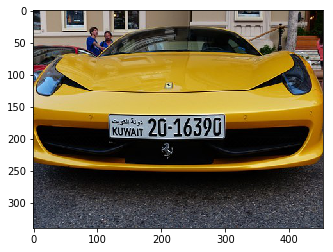

In [9]:
plt.imshow(carplate4)

In [14]:
notcarplate5 = cv2.imread('C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/train/not_car_plate/5.jpg')
notcarplate5 = cv2.cvtColor(notcarplate5,cv2.COLOR_BGR2RGB)

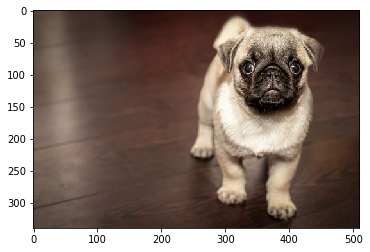

In [15]:
plt.imshow(notcarplate5)

Preparing the data into Keras


In [16]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [17]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [18]:
image_gen.flow_from_directory('C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/train')

Found 70 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory('C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/test')

Found 30 images belonging to 2 classes.


# Resizing the Images


In [20]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [21]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=carplate , 1=notcarplate
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

# Training the model

In [24]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 70 images belonging to 2 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory('C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 30 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'car_plate': 0, 'not_car_plate': 1}

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
results = model.fit_generator(train_image_gen,epochs=15,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/15
150/150 [==============================] - 196s 1s/step - loss: 0.4611 - acc: 0.7700 - val_loss: 0.8618 - val_acc: 0.7333
Epoch 2/15
150/150 [==============================] - 258s 2s/step - loss: 0.1800 - acc: 0.9275 - val_loss: 1.3099 - val_acc: 0.8000
Epoch 3/15
150/150 [==============================] - 1909s 13s/step - loss: 0.1613 - acc: 0.9370 - val_loss: 1.4045 - val_acc: 0.6333
Epoch 4/15
150/150 [==============================] - 284s 2s/step - loss: 0.1057 - acc: 0.9639 - val_loss: 1.2846 - val_acc: 0.7667
Epoch 5/15
150/150 [==============================] - 267s 2s/step - loss: 0.0776 - acc: 0.9724 - val_loss: 1.5026 - val_acc: 0.6333
Epoch 6/15
150/150 [==============================] - 320s 2s/step - loss: 0.0986 - acc: 0.9656 - val_loss: 1.4384 - val_acc: 0.7667
Epoch 7/15
150/150 [==============================] - 289s 2s/step - loss: 0.0762 - acc: 0.9718 - val_loss: 1.6614 - val_acc: 0.7000
Epoch 8/15
150/150 [==============================] - 212s 1s/step 

In [29]:
model.save('carplate_id.h5')

In [30]:
results.history['acc']

[0.7680952378823643,
 0.9242857139451163,
 0.9390476189340864,
 0.9642857138883499,
 0.9723809522674197,
 0.9685714281740643,
 0.973333333106268,
 0.9814285712582724,
 0.9780952378114065,
 0.984285714058649,
 0.9823809522106534,
 0.9909523808388483,
 0.9904761904194241,
 0.9904761904194241,
 0.9957142857142857]

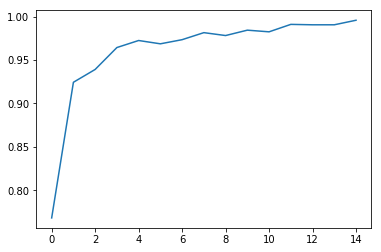

In [31]:
plt.plot(results.history['acc'])

# Predicting new images

In [32]:
train_image_gen.class_indices

{'car_plate': 0, 'not_car_plate': 1}

# FOR CAR PLATE IMAGES REMEMBER 0 IS FOR CAR PLATE

In [46]:
import numpy as np
from keras.preprocessing import image

carplate_file = 'C:/Users/HP/Downloads/ML & Data Sci/Python for Computer Vision with OpenCV and Deep Learning/DATA/test/car_plate/37.jpg'

carplate_img = image.load_img(carplate_file, target_size=(150, 150))

carplate_img = image.img_to_array(carplate_img)

carplate_img = np.expand_dims(carplate_img, axis=0)
carplate_img = carplate_img/255

In [47]:
prediction_prob = model.predict(carplate_img)

In [48]:
# Output prediction
print(f'Probability that image is a car is: {prediction_prob} ')

Probability that image is a car is: [[0.01782189]] 


# FOR NOT CAR PLATE IMAGES REMEMBER 1 IS FOR NOT CAR PLATE

In [55]:
import numpy as np
from keras.preprocessing import image

notcarplate_file = 'C:/Users/HP/Downloads/ML & Data Sci/Python for Computer (Vision) with OpenCV and Deep Learning/DATA/test/not_car_plate/37.png'

notcarplate_img = image.load_img(notcarplate_file, target_size=(150, 150))

notcarplate_img = image.img_to_array(notcarplate_img)

notcarplate_img = np.expand_dims(notcarplate_img, axis=0)
notcarplate_img = notcarplate_img/255

In [65]:
prediction_prob = model.predict(notcarplate_img)
if prediction_prob <= 0.4:
    print (f'The Image is a car plate')
    print(f'{prediction_prob} ')
else:
    print(f'The Image is not a car plate')
    print(f'{prediction_prob}')


The Image is not a car plate
[[0.9999975]]
